In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
Url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
df = pd.read_csv(Url)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df['Sex'].unique())
print(df['Age'].unique())

['male' 'female']
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Age'>

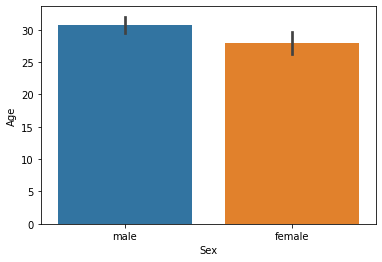

In [7]:
sns.barplot(x='Sex',y='Age',data=df)

In [8]:
age_count = pd.isnull(df['Age']).groupby(df['Sex']).sum()
age_count

Sex
female     53
male      124
Name: Age, dtype: int64

In [9]:
null_age_df = df[df['Age'].isnull()==True]
null_age_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [10]:
ticket_list = df.groupby('Age')

In [11]:
ticket_list.first()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
0.42,804,1,3,"Thomas, Master. Assad Alexander",male,0,1,2625,8.5167,None,C
0.67,756,1,2,"Hamalainen, Master. Viljo",male,1,1,250649,14.5000,None,S
0.75,470,1,3,"Baclini, Miss. Helene Barbara",female,2,1,2666,19.2583,None,C
0.83,79,1,2,"Caldwell, Master. Alden Gates",male,0,2,248738,29.0000,None,S
0.92,306,1,1,"Allison, Master. Hudson Trevor",male,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
70.00,673,0,2,"Mitchell, Mr. Henry Michael",male,0,0,C.A. 24580,10.5000,B22,S
70.50,117,0,3,"Connors, Mr. Patrick",male,0,0,370369,7.7500,None,Q
71.00,97,0,1,"Goldschmidt, Mr. George B",male,0,0,PC 17754,34.6542,A5,C


In [12]:
df["Ticket"].index

RangeIndex(start=0, stop=891, step=1)

In [13]:
# good groupby example : https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/#:~:text=2.-,Use%20count()%20by%20Column%20Name,floating%20type%20data%20as%20well.
df.groupby(['Pclass']).count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [14]:
df.groupby(['Pclass'])['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

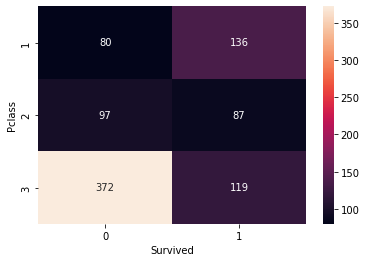

In [15]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

In [16]:
group.size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

# observation
1. first class passengers servival rate is more

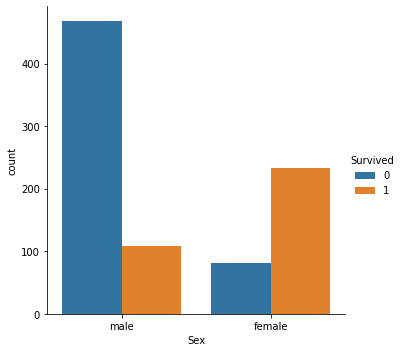

In [17]:
sns.catplot(x ="Sex", hue ="Survived",kind ="count", data = df)

In [18]:
df['family_size'] = df['Parch']+df['SibSp']

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [20]:
df['alone'] = 0
df.loc[df.family_size==0, 'alone'] = 1

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


/var/www/html/www/python/ai/venv10/lib/python3.10/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


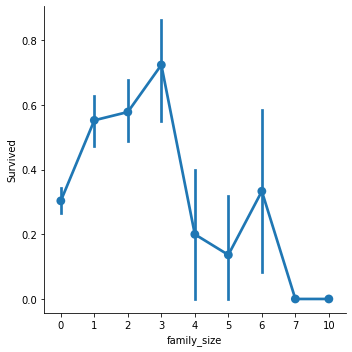

In [22]:
sns.factorplot(x='family_size',y='Survived',data=df)

/var/www/html/www/python/ai/venv10/lib/python3.10/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


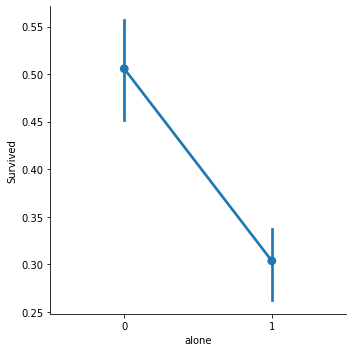

In [23]:
sns.factorplot(x='alone',y='Survived',data=df)

# observation
1. more than 3 family member are servive range is less
2. single man servive rate is lower

In [24]:
df['fare_range'] = pd.qcut(df.Fare,4)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone,fare_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,"(7.91, 14.454]"


<AxesSubplot:xlabel='fare_range', ylabel='Survived'>

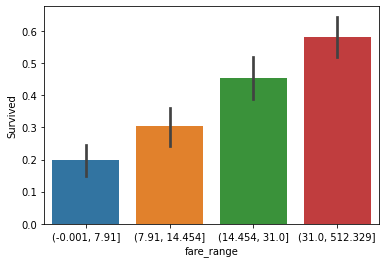

In [26]:
sns.barplot(x='fare_range',y='Survived',data=df)

# observation
1. more fare passenger servive possiblity is more

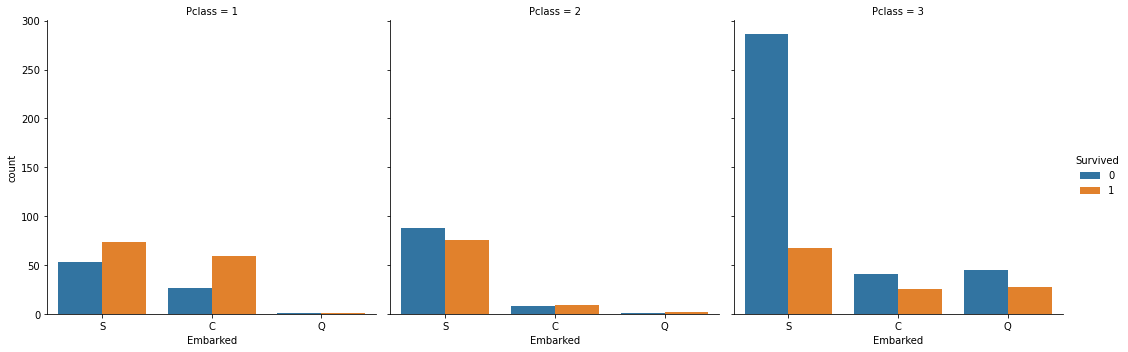

In [27]:
sns.catplot(x='Embarked',hue='Survived',data=df,kind='count',col ='Pclass')

# observation
1. S Embarked Survived rating is more.
2. is servive is 1 then missing value Embarked can fill s or c/q

In [28]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone,fare_range
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,1,"(31.0, 512.329]"
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,1,"(31.0, 512.329]"


In [29]:
df.loc[[61,829],"Embarked"] = "S"

In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
family_size      0
alone            0
fare_range       0
dtype: int64

In [31]:
df.iloc[[61,829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone,fare_range
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,0,1,"(31.0, 512.329]"
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,0,1,"(31.0, 512.329]"


# age null value handle
https://www.kaggle.com/code/allohvk/titanic-missing-age-imputation-tutorial-advanced
# dataset more advance eda
https://www.kaggle.com/code/kanncaa1/dataiteam-titanic-eda/notebook

In [32]:
df['age_cut'] = pd.qcut(df['Age'],10)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone,fare_range,age_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,"(-0.001, 7.91]","(19.0, 22.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,"(31.0, 512.329]","(36.0, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,"(7.91, 14.454]","(25.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,"(31.0, 512.329]","(31.8, 36.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,"(7.91, 14.454]","(31.8, 36.0]"


<AxesSubplot:xlabel='age_cut', ylabel='count'>

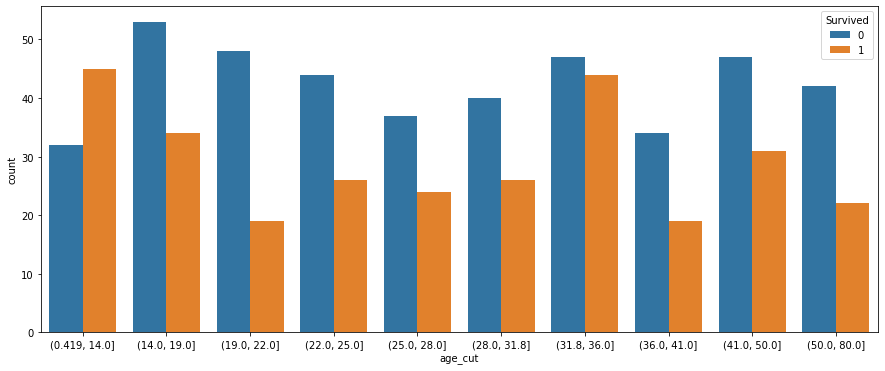

In [34]:
fig,ax = plt.subplots(figsize=(15,6))
sns.countplot(x='age_cut',hue='Survived',data=df,ax=ax)

In [35]:
null_ages = df[df.Age.isnull()==True]
null_ages.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone,fare_range,age_cut
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1,"(7.91, 14.454]",NaN
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,1,"(7.91, 14.454]",NaN
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0,1,"(-0.001, 7.91]",NaN
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0,1,"(-0.001, 7.91]",NaN
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0,1,"(-0.001, 7.91]",NaN


In [36]:
null_ages.groupby(["Survived",'Pclass'])["Survived"].count()

Survived  Pclass
0         1          16
          2           7
          3         102
1         1          14
          2           4
          3          34
Name: Survived, dtype: int64

In [37]:
wioutnull_ages = df[df.Age.isnull()==False]
wioutnull_ages.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone,fare_range,age_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,"(-0.001, 7.91]","(19.0, 22.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,"(31.0, 512.329]","(36.0, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,"(7.91, 14.454]","(25.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,"(31.0, 512.329]","(31.8, 36.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,"(7.91, 14.454]","(31.8, 36.0]"


In [38]:
wioutnull_ages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  714 non-null    int64   
 1   Survived     714 non-null    int64   
 2   Pclass       714 non-null    int64   
 3   Name         714 non-null    object  
 4   Sex          714 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        714 non-null    int64   
 7   Parch        714 non-null    int64   
 8   Ticket       714 non-null    object  
 9   Fare         714 non-null    float64 
 10  Cabin        185 non-null    object  
 11  Embarked     714 non-null    object  
 12  family_size  714 non-null    int64   
 13  alone        714 non-null    int64   
 14  fare_range   714 non-null    category
 15  age_cut      714 non-null    category
dtypes: category(2), float64(2), int64(7), object(5)
memory usage: 85.7+ KB


In [39]:
wioutnull_ages.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
family_size      0
alone            0
fare_range       0
age_cut          0
dtype: int64

In [40]:
wioutnull_ages['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [41]:
wioutnull_ages['Sex'] = wioutnull_ages['Sex'].map({"male":0,"female":1})
wioutnull_ages['Embarked'] = wioutnull_ages['Embarked'].map({"S":0,"C":1,"Q":2})

/tmp/ipykernel_24286/2444605657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wioutnull_ages['Sex'] = wioutnull_ages['Sex'].map({"male":0,"female":1})
/tmp/ipykernel_24286/2444605657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wioutnull_ages['Embarked'] = wioutnull_ages['Embarked'].map({"S":0,"C":1,"Q":2})


In [42]:
wioutnull_ages.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone,fare_range,age_cut
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,"(-0.001, 7.91]","(19.0, 22.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,0,"(31.0, 512.329]","(36.0, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,"(7.91, 14.454]","(25.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,0,"(31.0, 512.329]","(31.8, 36.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1,"(7.91, 14.454]","(31.8, 36.0]"


In [43]:
blacklist = ["PassengerId","Name","Ticket","Cabin","Age","age_cut","fare_range"]
x_age = wioutnull_ages.drop(blacklist,axis=1)

In [44]:
x_age.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,family_size,alone
0,0,3,0,1,0,7.2500,0,1,0
1,1,1,1,1,0,71.2833,1,1,0
2,1,3,1,0,0,7.9250,0,0,1
3,1,1,1,1,0,53.1000,0,1,0
4,0,3,0,0,0,8.0500,0,0,1


In [45]:
y_age = wioutnull_ages["Age"]

In [46]:
x_age_train, x_age_test, y_age_train, y_age_test = train_test_split(
    x_age, y_age, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression

In [47]:
x_age.isnull().sum()

Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
family_size    0
alone          0
dtype: int64

In [48]:
lr = LinearRegression()
lr.fit(x_age_train, y_age_train)

LinearRegression()

In [49]:
predict = lr.predict(x_age_test)
print("train score", lr.score(x_age_train, y_age_train))
print("test score", lr.score(x_age_test, y_age_test))

train score 0.2693139903307018
test score 0.2523439436507202


In [50]:
predict.shape

(236,)

In [51]:
predict2 = lr.predict(x_age_train)
predict2.shape

(478,)

In [52]:
df['Sex'] = df['Sex'].map({"male":0,"female":1})

In [53]:
df['Embarked'] = df['Embarked'].map({"S":0,"C":1,"Q":2})

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone,fare_range,age_cut
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,"(-0.001, 7.91]","(19.0, 22.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,0,"(31.0, 512.329]","(36.0, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,"(7.91, 14.454]","(25.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,0,"(31.0, 512.329]","(31.8, 36.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1,"(7.91, 14.454]","(31.8, 36.0]"


In [55]:
new_pred = lr.predict(df[["Survived","Pclass","Sex","SibSp", \
                          "Parch","Fare","Embarked","family_size","alone"]])


In [56]:
len(new_pred) 

891

In [57]:
len(df['Age'])

891

In [58]:
ln_predict_df = df.copy()
print(ln_predict_df.shape)

(891, 16)


In [59]:
# missing value imputation with linear regression value though regression result is worse.
ln_predict_df['Age'] = [round(new_pred[i],2) if np.isnan(age) else age for i, age in enumerate(ln_predict_df['Age'])]

In [60]:
ln_predict_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone,fare_range,age_cut
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,"(-0.001, 7.91]","(19.0, 22.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,0,"(31.0, 512.329]","(36.0, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,"(7.91, 14.454]","(25.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,0,"(31.0, 512.329]","(31.8, 36.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1,"(7.91, 14.454]","(31.8, 36.0]"


In [61]:
ln_predict_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
family_size      0
alone            0
fare_range       0
age_cut        177
dtype: int64

<AxesSubplot:xlabel='Fare'>

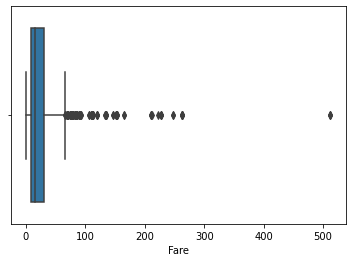

In [62]:
sns.boxplot(x='Fare',data=df)

In [63]:
print('Missing values Percentage: \n\n', round (df.isnull().sum().sort_values(ascending=False)/len(df)*100,1))

Missing values Percentage: 

 Cabin          77.1
Age            19.9
age_cut        19.9
PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Embarked        0.0
family_size     0.0
alone           0.0
fare_range      0.0
dtype: float64


In [64]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
age_cut        177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
family_size      0
alone            0
fare_range       0
dtype: int64

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone,fare_range,age_cut
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,"(-0.001, 7.91]","(19.0, 22.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,0,"(31.0, 512.329]","(36.0, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,"(7.91, 14.454]","(25.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,0,"(31.0, 512.329]","(31.8, 36.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1,"(7.91, 14.454]","(31.8, 36.0]"


In [66]:
df[df['Age'].isnull() & df['Name'].str.contains('Master')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone,fare_range,age_cut
65,66,1,3,"Moubarek, Master. Gerios",0,NaN,1,1,2661,15.2458,NaN,1,2,0,"(14.454, 31.0]",NaN
159,160,0,3,"Sage, Master. Thomas Henry",0,NaN,8,2,CA. 2343,69.5500,NaN,0,10,0,"(31.0, 512.329]",NaN
176,177,0,3,"Lefebre, Master. Henry Forbes",0,NaN,3,1,4133,25.4667,NaN,0,4,0,"(14.454, 31.0]",NaN
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",0,NaN,1,1,2661,15.2458,NaN,1,2,0,"(14.454, 31.0]",NaN


In [67]:
df[['Name','Age']].tail()

,Name,Age
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0
890,"Dooley, Mr. Patrick",32.0


In [68]:
# Master name contain age mean value almost 5 so they ar child
df[df['Name'].str.contains('Master')]['Age'].mean()

4.574166666666667

In [69]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone,fare_range,age_cut,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,"(-0.001, 7.91]","(19.0, 22.0]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,0,"(31.0, 512.329]","(36.0, 41.0]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,"(7.91, 14.454]","(25.0, 28.0]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,0,"(31.0, 512.329]","(31.8, 36.0]",Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1,"(7.91, 14.454]","(31.8, 36.0]",Mr


In [71]:
df.groupby(['Title','Pclass'])['Age'].agg(['mean','count'])

mean  count
Title    Pclass                  
Capt     1       70.000000      1
Col      1       58.000000      2
Countess 1       33.000000      1
Don      1       40.000000      1
Dr       1       43.750000      4
         2       38.500000      2
Jonkheer 1       38.000000      1
Lady     1       48.000000      1
Major    1       48.500000      2
Master   1        5.306667      3
         2        2.258889      9
         3        5.350833     24
Miss     1       30.000000     45
         2       22.390625     32
         3       16.123188     69
Mlle     1       24.000000      2
Mme      1       24.000000      1
Mr       1       41.580460     87
         2       32.768293     82
         3       28.724891    229
Mrs      1       40.882353     34
         2       33.682927     41
         3       33.515152     33
Ms       2       28.000000      1
Rev      2       43.166667      6
Sir      1       49.000000      1

In [72]:
TitleDict = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty", \
             "Don": "Royalty", "Sir" : "Royalty","Dr": "Royalty","Rev": "Royalty", \
             "Countess":"Royalty", "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs","Mr" : "Mr", \
             "Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

In [73]:
df['Title'] = df['Title'].map(TitleDict)
df.groupby(['Title','Pclass'])['Age'].agg(['mean','count'])

mean  count
Title   Pclass                  
Master  1        5.306667      3
        2        2.258889      9
        3        5.350833     24
Miss    1       29.744681     47
        2       22.390625     32
        3       16.123188     69
Mr      1       41.580460     87
        2       32.768293     82
        3       28.724891    229
Mrs     1       40.400000     35
        2       33.547619     42
        3       33.515152     33
Officer 1       56.600000      5
Royalty 1       42.555556      9
        2       42.000000      8

In [74]:
print("Avg age of Miss Title",round(df[df['Title']=='Miss']['Age'].mean()))
print("Avg age of Miss Title without Parents",round(df[(df['Title']=='Miss') & (df['Parch']==0)]['Age'].mean()))
print("Avg age of Miss Title with Parents",round(df[(df['Title']=='Miss') & (df['Parch']!=0)]['Age'].mean()))

Avg age of Miss Title 22
Avg age of Miss Title without Parents 28
Avg age of Miss Title with Parents 12


In [75]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [76]:
grp = df.groupby(['Pclass','Sex','Title'])['Age'].mean().reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
grp

,Sex,Pclass,Title,Age
0,0,1,Master,5.306667
1,0,1,Mr,41.580460
2,0,1,Officer,56.600000
3,0,1,Royalty,42.166667
4,1,1,Miss,29.744681
5,1,1,Mrs,40.400000
6,1,1,Royalty,43.333333
7,0,2,Master,2.258889
8,0,2,Mr,32.768293
9,0,2,Royalty,42.000000


In [77]:
print('\n', 'Lookup works like a charm now but not quite: ', grp[(grp.Pclass==2) & (grp.Sex==0) & (grp.Title=='Master')]['Age'])


 Lookup works like a charm now but not quite:  7    2.258889
Name: Age, dtype: float64


In [78]:
def fill_age(x):
    return grp[(grp.Pclass==x.Pclass)&(grp.Sex==x.Sex)&(grp.Title==x.Title)]['Age'].values[0]

In [79]:
df['Age'] = df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)

In [80]:
df.iloc[5:7]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone,fare_range,age_cut,Title
5,6,0,3,"Moran, Mr. James",0,28.724891,0,0,330877,8.4583,NaN,2,0,1,"(7.91, 14.454]",NaN,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,0,0,1,"(31.0, 512.329]","(50.0, 80.0]",Mr


In [81]:
df.Age.isnull().sum()

0

# 
https://www.geeksforgeeks.org/decision-tree/ 

https://www.geeksforgeeks.org/ml-feature-scaling-part-2/#:~:text=Feature%20Scaling%20is%20a%20technique,magnitudes%20or%20values%20or%20units.


# The Big Question – Normalize or Standardize?
Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.
However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.

In [82]:
feture_scale_data = df[["Age","Fare"]]
feture_scale_data.shape

(891, 2)

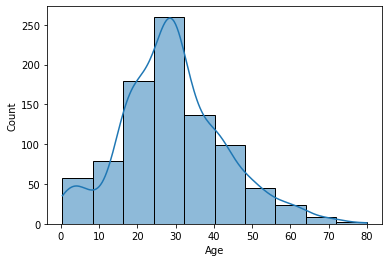

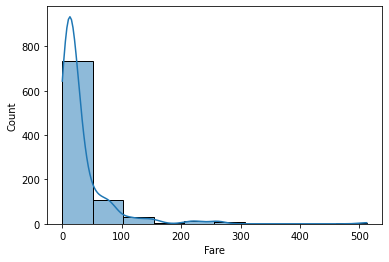

In [83]:
# multiple plot in for loop with seaborn
for fe in feture_scale_data:
    plt.figure()
    sns.histplot(data=df, x=fe,bins=10,kde=True)

In [84]:
#sns.histplot(data=df, x="Fare",bins=10,kde=True)

In [85]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
# Scaled feature
x_after_min_max_scaler = min_max_scaler.fit_transform(df[['Age']])
  
#print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)
# same 2 dymension to 1 dymension make with reshape or flatten
#x_after_min_max_scaler = x_after_min_max_scaler.reshape(-1)
x_after_min_max_scaler = x_after_min_max_scaler.flatten()
# print(x_after_min_max_scaler.ndim)
# print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)

In [86]:
#df['Age'] = x_after_min_max_scaler

#
https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

In [87]:
df['Age'] = df['Age'].astype(int)
df.loc[ df['Age'] <= 11, 'Age'] = 0
df.loc[(df['Age'] > 11) & (df['Age'] <= 18), 'Age'] = 1
df.loc[(df['Age'] > 18) & (df['Age'] <= 22), 'Age'] = 2
df.loc[(df['Age'] > 22) & (df['Age'] <= 27), 'Age'] = 3
df.loc[(df['Age'] > 27) & (df['Age'] <= 33), 'Age'] = 4
df.loc[(df['Age'] > 33) & (df['Age'] <= 40), 'Age'] = 5
df.loc[(df['Age'] > 40) & (df['Age'] <= 66), 'Age'] = 6
df.loc[ df['Age'] > 66, 'Age'] = 6

In [88]:
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[(df['Fare'] > 31) & (df['Fare'] <= 99), 'Fare']   = 3
df.loc[(df['Fare'] > 99) & (df['Fare'] <= 250), 'Fare']   = 4
df.loc[ df['Fare'] > 250, 'Fare'] = 5
df['Fare'] = df['Fare'].astype(int)

In [90]:
title_dic = {
    "Master":0,
    "Mr":1,
    "Mrs":2,
    "Miss":3,
    "Officer":4,
    "Royalty":5
}

In [91]:
df.Title = df.Title.map(title_dic)

In [93]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone,fare_range,age_cut,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,0,NaN,0,1,0,"(-0.001, 7.91]","(19.0, 22.0]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,3,C85,1,1,0,"(31.0, 512.329]","(36.0, 41.0]",2


In [95]:
blklst_clm = ["PassengerId","Name","Ticket","Cabin","fare_range","age_cut"]

In [96]:
df.drop(blklst_clm,axis=1,inplace=True)

In [97]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,alone,Title
0,0,3,0,2,1,0,0,0,1,0,1
1,1,1,1,5,1,0,3,1,1,0,2


In [98]:
x = df.drop('Survived',axis=1)

In [99]:
x.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,alone,Title
0,3,0,2,1,0,0,0,1,0,1
1,1,1,5,1,0,3,1,1,0,2


In [100]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [101]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [108]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [104]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print(acc_random_forest)

91.28


In [107]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
Y_pred = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

91.28


In [109]:
# Cross validation score
scores = cross_val_score(decision_tree, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.66666667 0.85       0.76666667 0.81666667 0.76666667 0.75
 0.83050847 0.77966102 0.76271186 0.91525424]
Mean: 0.7904802259887006
Standard Deviation: 0.06355305053804858


In [110]:
# Feature importance
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.210
Sex,0.181
Age,0.145
Pclass,0.118
Fare,0.115
family_size,0.069
Embarked,0.067
SibSp,0.047
Parch,0.034


In [111]:
# Feature importance
importances1 = pd.DataFrame({'feature':x_train.columns,'importance':np.round(decision_tree.feature_importances_,3)})
importances1 = importances1.sort_values('importance',ascending=False).set_index('feature')
importances1.head(15)

,importance
feature,
Sex,0.374
Pclass,0.158
Age,0.104
Fare,0.084
family_size,0.074
Title,0.074
SibSp,0.073
Embarked,0.048
Parch,0.008


<AxesSubplot:xlabel='feature'>

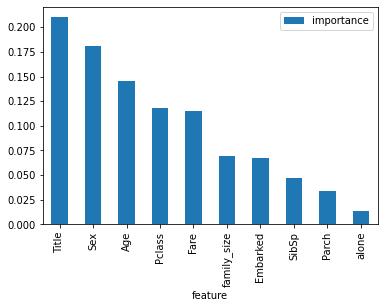

In [112]:
importances.plot.bar()

<AxesSubplot:xlabel='feature'>

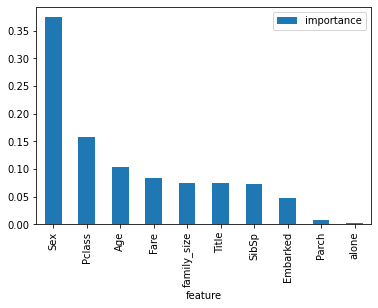

In [113]:
importances1.plot.bar()